# 03机器学习预测慢性肾病的终末期肾病

### 第一部分：数据准备


In [57]:
# import pandas as pd
# import numpy as np
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split

# # 加载数据
# data_path = "/workspace/data/simulated_ckd_data_with_missing_and_imputation.csv"
# data = pd.read_csv(data_path)

# # 分离特征和目标变量
# X = data.drop(columns=["ESKD Status"])
# y = data["ESKD Status"].map({"ESKD+": 1, "ESKD-": 0})

# # 分离连续变量和分类变量
# continuous_features = X.select_dtypes(include=[np.number]).columns.tolist()
# categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# # 处理缺失值：多重插补
# imputer = IterativeImputer(random_state=42, max_iter=10, n_nearest_features=5)
# X_imputed = pd.DataFrame(imputer.fit_transform(X[continuous_features]), columns=continuous_features)

# # 编码分类变量：独热编码
# encoder = OneHotEncoder(handle_unknown="ignore")
# X_encoded = encoder.fit_transform(X[categorical_features]).toarray()
# encoded_feature_names = encoder.get_feature_names_out(categorical_features)
# X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# # 合并处理后的数据
# X_prepared = pd.concat([X_imputed, X_encoded_df], axis=1)

# # 数据标准化
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_prepared)

# # 数据分割：训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

#### 1.1 加载数据并打印基本信息

In [58]:
# ! pip install seaborn

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data_path = "/workspace/data/simulated_ckd_data_with_missing_and_imputation.csv"
data = pd.read_csv(data_path)

# 打印数据前几行
print("数据前几行：")
print(data.head())

# 打印数据结构
print("\n数据结构：")
print(data.info())

# 分离特征和目标变量
X = data.drop(columns=["ESKD Status"])
y = data["ESKD Status"].map({"ESKD+": 1, "ESKD-": 0})

# 分离连续变量和分类变量
continuous_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# 打印连续变量和分类变量的名称
print("\n连续变量：")
print(continuous_features)
print("\n分类变量：")
print(categorical_features)

数据前几行：
         Age  Systolic Blood Pressure (SBP)  Diastolic Blood Pressure (DBP)  \
0  66.542169                     118.614983                      100.582690   
1  55.366548                     104.461432                       91.112865   
2  69.199318                     113.066448                       89.067094   
3  84.605325                     105.440014                       84.277049   
4  53.678901                     112.129456                       86.339808   

         BMI  Creatinine (µmol/L)  Urea (mmol/L)  Total Protein (g/L)  \
0  30.783687                  NaN       6.470639            79.001632   
1  25.186117           123.633731       8.942560            71.611136   
2  21.474499           101.442446       8.543357            74.921536   
3  19.877840           132.324416       8.236120            63.556421   
4  24.100255           137.732576       5.909703            66.649609   

   Albumin (g/L)  ALT (U/L)  AST (U/L)  ...  Chlorine (mmol/L)  \
0      34.512

#### 1.2 打印缺失值的数量和百分比


缺失值的数量和百分比：
                                             Variable  Missing Count  \
0                                                 Age              0   
1                       Systolic Blood Pressure (SBP)              0   
2                      Diastolic Blood Pressure (DBP)              0   
3                                                 BMI              0   
4                                 Creatinine (µmol/L)             12   
5                                       Urea (mmol/L)             12   
6                                 Total Protein (g/L)              0   
7                                       Albumin (g/L)              0   
8                                           ALT (U/L)              9   
9                                           AST (U/L)              9   
10                                          ALP (U/L)              9   
11                                Urine Acid (µmol/L)              0   
12                                   Calcium (mmol/

/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: G

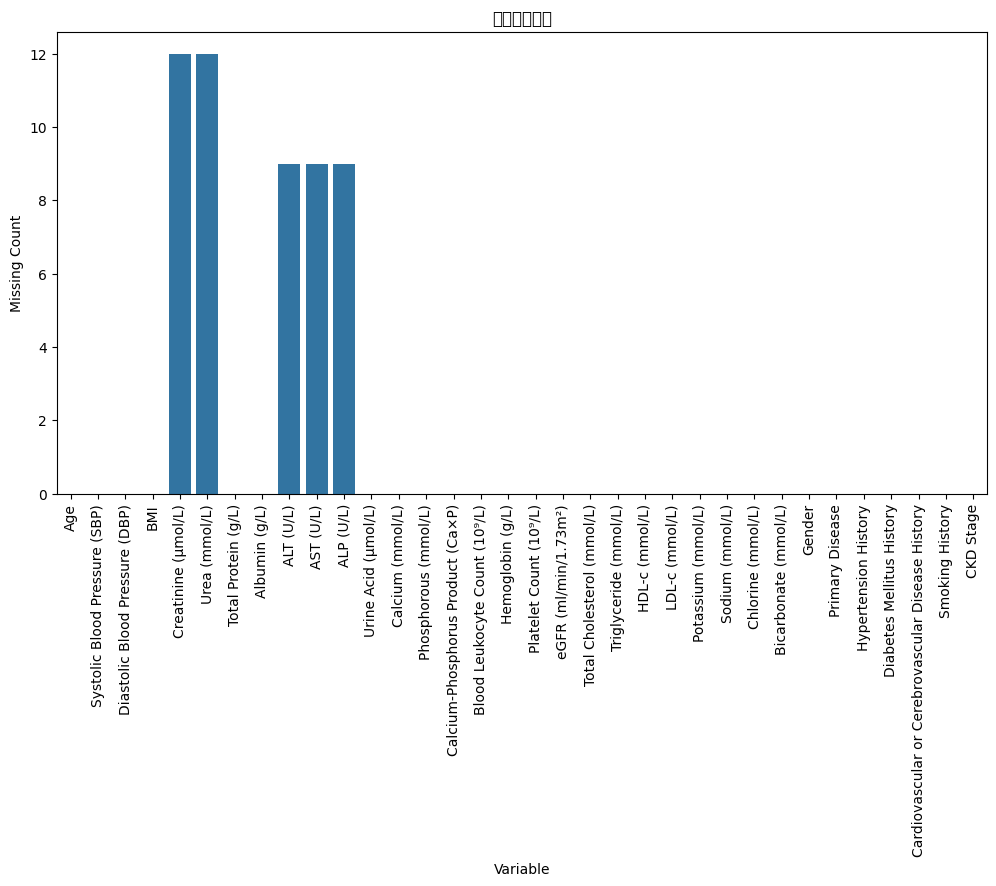

In [60]:
# 计算缺失值的数量和百分比
missing_data = X.isnull().sum().reset_index()
missing_data.columns = ["Variable", "Missing Count"]
missing_data["Missing Percentage"] = (missing_data["Missing Count"] / len(X)) * 100

# 打印缺失值的数量和百分比
print("\n缺失值的数量和百分比：")
print(missing_data)

# 绘制缺失值的数量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x="Variable", y="Missing Count", data=missing_data)
plt.xticks(rotation=90)
plt.title("缺失值的数量")
plt.show()

#### 1.3 填充缺失值并重新打印缺失值信息

In [61]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 处理缺失值：多重插补
imputer = IterativeImputer(random_state=42, max_iter=10, n_nearest_features=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X[continuous_features]), columns=continuous_features)

# 编码分类变量：独热编码
encoder = OneHotEncoder(handle_unknown="ignore")
X_encoded = encoder.fit_transform(X[categorical_features]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# 合并处理后的数据
X_prepared = pd.concat([X_imputed, X_encoded_df], axis=1)

# 打印填充缺失值后的缺失值数量和百分比
missing_data_after_imputation = X_prepared.isnull().sum().reset_index()
missing_data_after_imputation.columns = ["Variable", "Missing Count"]
missing_data_after_imputation["Missing Percentage"] = (missing_data_after_imputation["Missing Count"] / len(X_prepared)) * 100

print("\n填充缺失值后的缺失值数量和百分比：")
print(missing_data_after_imputation)


填充缺失值后的缺失值数量和百分比：
                                             Variable  Missing Count  \
0                                                 Age              0   
1                       Systolic Blood Pressure (SBP)              0   
2                      Diastolic Blood Pressure (DBP)              0   
3                                                 BMI              0   
4                                 Creatinine (µmol/L)              0   
5                                       Urea (mmol/L)              0   
6                                 Total Protein (g/L)              0   
7                                       Albumin (g/L)              0   
8                                           ALT (U/L)              0   
9                                           AST (U/L)              0   
10                                          ALP (U/L)              0   
11                                Urine Acid (µmol/L)              0   
12                                   Calcium 

#### 1.4 绘制连续变量的分布

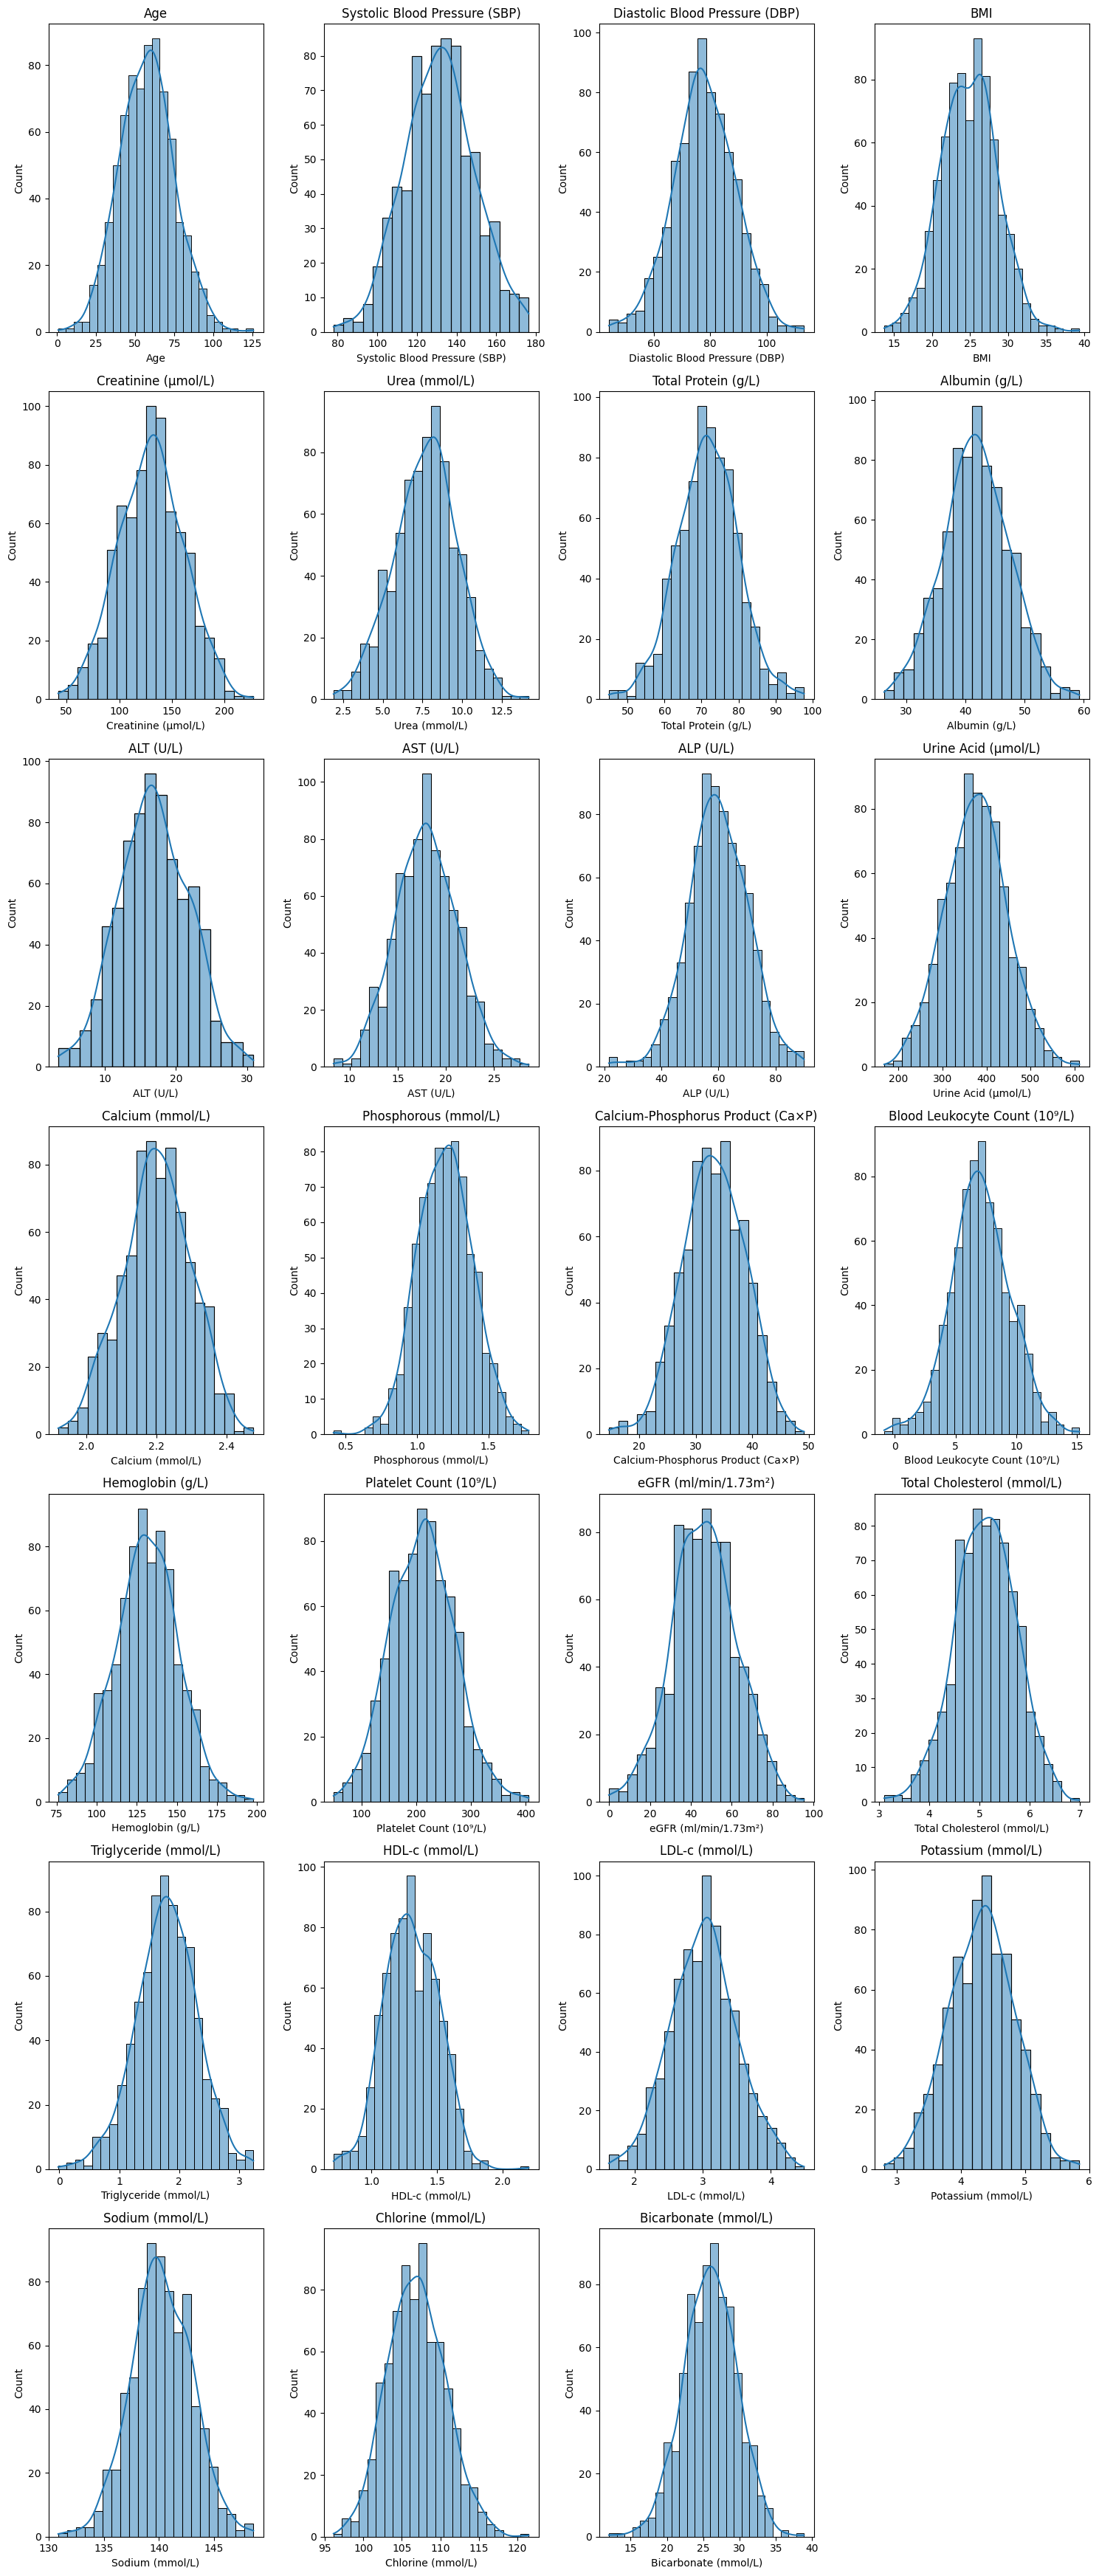

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制连续变量的分布
num_features = len(continuous_features)
num_columns = 4  # 每行显示4个子图
num_rows = (num_features + num_columns - 1) // num_columns  # 计算需要的行数

plt.figure(figsize=(15, 5 * num_rows))  # 根据行数调整高度
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(num_rows, num_columns, i)  # 动态调整子图位置
    sns.histplot(X_imputed[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

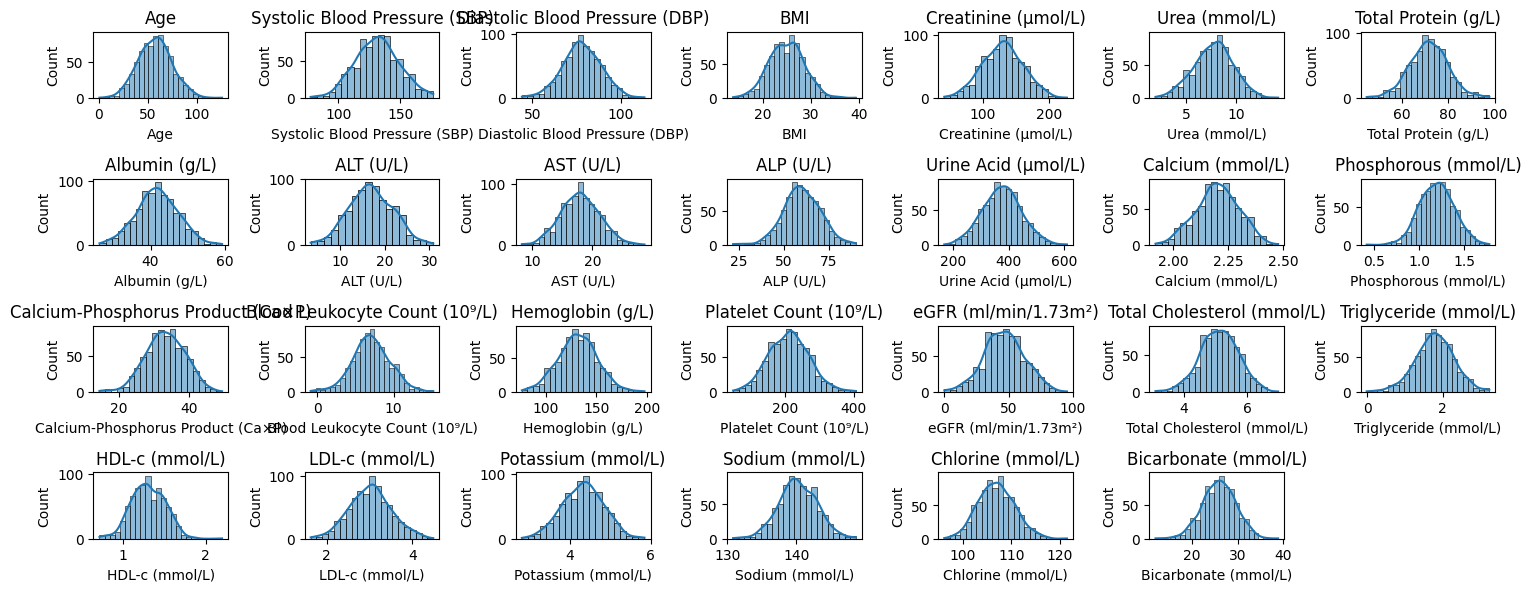

In [63]:
# 绘制连续变量的分布
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(7, 7, i)
    sns.histplot(X_imputed[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

#### 1.6 数据标准化和分割

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_prepared)

# 数据分割：训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 打印训练集和测试集的形状
print("\n训练集特征形状：", X_train.shape)
print("训练集目标形状：", y_train.shape)
print("测试集特征形状：", X_test.shape)
print("测试集目标形状：", y_test.shape)


训练集特征形状： (598, 48)
训练集目标形状： (598,)
测试集特征形状： (150, 48)
测试集目标形状： (150,)


#### 1.5 绘制分类变量的分布

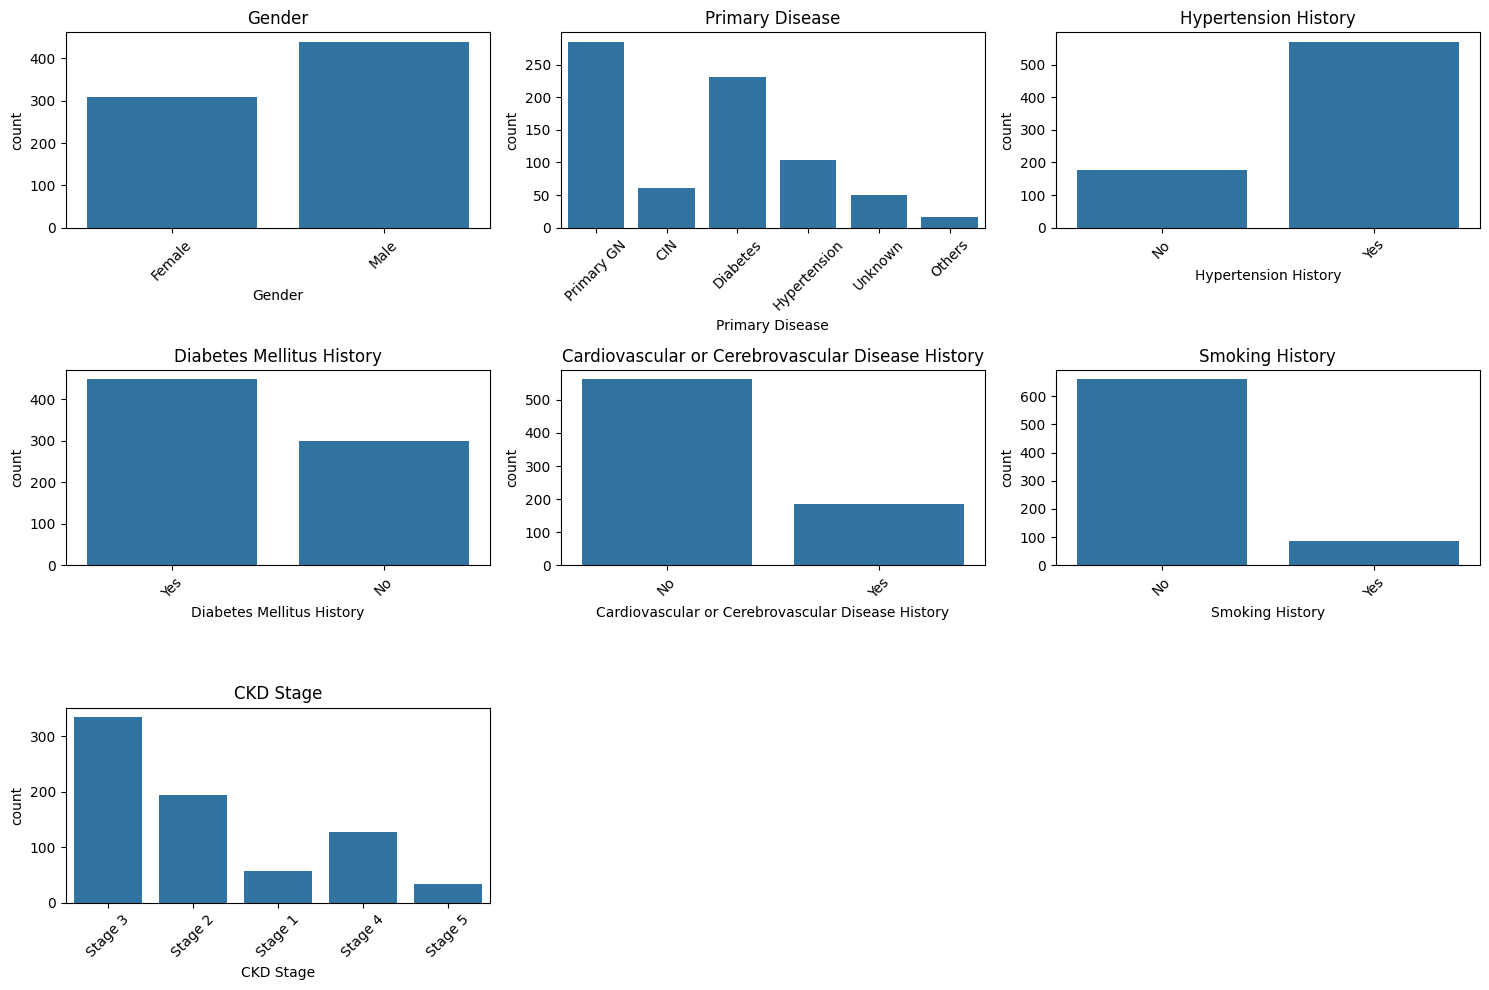

In [65]:
# 绘制分类变量的分布
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=X[feature])
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 第二部分：数据预处理


In [66]:
from sklearn.model_selection import StratifiedKFold

# 五折交叉验证
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 第三部分：模型开发


#### 使用默认的超参数网格

In [67]:
# # 导入所需的机器学习模型和工具
# from sklearn.linear_model import LogisticRegression  # 逻辑回归模型
# from sklearn.naive_bayes import GaussianNB  # 高斯朴素贝叶斯模型
# from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
# from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
# from sklearn.neighbors import KNeighborsClassifier  # K近邻分类器
# from sklearn.model_selection import GridSearchCV  # 用于网格搜索的工具

# # 定义模型及其初始参数
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),  # 逻辑回归，设置最大迭代次数为1000
#     "Naive Bayes": GaussianNB(),  # 高斯朴素贝叶斯模型，无需额外参数
#     "Random Forest": RandomForestClassifier(),  # 随机森林模型，使用默认参数
#     "Decision Tree": DecisionTreeClassifier(),  # 决策树模型，使用默认参数
#     "K-Nearest Neighbors": KNeighborsClassifier()  # K近邻模型，使用默认参数
# }

# # 定义每个模型的超参数网格，用于网格搜索
# param_grids = {
#     "Logistic Regression": {"C": [0.1, 1, 10]},  # 逻辑回归的正则化强度参数C，尝试0.1、1和10
#     "Naive Bayes": {},  # 高斯朴素贝叶斯模型通常不需要额外的超参数调整
#     "Random Forest": {  # 随机森林的超参数
#         "n_estimators": [50, 100, 200],  # 树的数量，尝试50、100和200
#         "max_depth": [None, 10, 20]  # 树的最大深度，尝试None（不限制）、10和20
#     },
#     "Decision Tree": {  # 决策树的超参数
#         "max_depth": [None, 5, 10]  # 树的最大深度，尝试None（不限制）、5和10
#     },
#     "K-Nearest Neighbors": {  # K近邻的超参数
#         "n_neighbors": [3, 5, 7]  # 邻居的数量，尝试3、5和7
#     }
# }

# # 初始化一个字典，用于存储每个模型的最佳版本
# best_models = {}

# # 遍历每个模型及其超参数网格，进行训练和超参数优化
# for name, model in models.items():
#     print(f"Training {name}...")  # 打印当前正在训练的模型名称
#     # 使用GridSearchCV进行网格搜索
#     # 参数说明：
#     # - model: 当前模型
#     # - param_grids[name]: 当前模型的超参数网格
#     # - cv: 使用交叉验证策略（在代码中定义为cv）
#     # - scoring: 使用准确率作为评分标准
#     # - n_jobs=-1: 使用所有可用的CPU核心进行并行计算
#     grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring="accuracy", n_jobs=-1)
#     grid_search.fit(X_train, y_train)  # 在训练集上训练模型并进行网格搜索
#     best_models[name] = grid_search.best_estimator_  # 保存最佳模型
#     print(f"Best parameters for {name}: {grid_search.best_params_}")  # 打印最佳超参数

#### 指定原文中的超参数

In [68]:
# 导入所需的机器学习模型和工具
from sklearn.linear_model import LogisticRegression  # 逻辑回归模型
from sklearn.naive_bayes import GaussianNB  # 高斯朴素贝叶斯模型
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
from sklearn.neighbors import KNeighborsClassifier  # K近邻分类器

# 定义模型及其预设的超参数
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2',  # 使用L2正则化
        class_weight='balanced',  # 自动调整类别权重以平衡数据
        max_iter=100000,  # 设置最大迭代次数为100000，确保收敛
        C=10,  # 正则化强度的倒数，较小的值表示更强的正则化
        solver='liblinear'  # 使用liblinear求解器，适用于小数据集
    ),
    "Naive Bayes": GaussianNB(),  # 使用高斯朴素贝叶斯模型，适用于连续型数据
    "Random Forest": RandomForestClassifier(
        class_weight='balanced',  # 自动调整类别权重以平衡数据
        criterion='gini',  # 使用基尼不纯度作为分裂标准
        max_depth=9,  # 每棵树的最大深度为9
        max_features=17,  # 每次分裂考虑的最大特征数为17
        min_samples_leaf=6,  # 叶节点的最小样本数为6
        min_samples_split=30,  # 分裂内部节点所需的最小样本数为30
        n_estimators=32  # 随机森林中树的数量为32
    ),
    "Decision Tree": DecisionTreeClassifier(
        criterion='gini',  # 使用基尼不纯度作为分裂标准
        splitter='best',  # 选择最佳分裂方式
        max_depth=16,  # 树的最大深度为16
        max_features=15,  # 每次分裂考虑的最大特征数为15
        min_samples_leaf=5,  # 叶节点的最小样本数为5
        min_samples_split=0.0001  # 分裂内部节点所需的最小样本比例为0.0001
    ),
    "K-Nearest Neighbors": KNeighborsClassifier(
        weights='distance',  # 使用距离加权投票
        metric='minkowski',  # 使用闵可夫斯基距离度量
        n_neighbors=16,  # 考虑的最近邻数量为16
        leaf_size=10  # 叶节点的大小为10
    )
}

# 初始化一个字典，用于存储每个训练完成的模型
best_models = {}

# 遍历每个模型并进行训练
for name, model in models.items():
    print(f"Training {name}...")  # 打印当前正在训练的模型名称
    model.fit(X_train, y_train)  # 在训练集上训练模型
    best_models[name] = model  # 将训练完成的模型存储到字典中
    print(f"{name} training completed.")  # 打印训练完成的提示信息

Training Logistic Regression...
Logistic Regression training completed.
Training Naive Bayes...
Naive Bayes training completed.
Training Random Forest...
Random Forest training completed.
Training Decision Tree...
Decision Tree training completed.
Training K-Nearest Neighbors...
K-Nearest Neighbors training completed.


In [69]:
# # 导入所需的机器学习模型和工具
# from sklearn.linear_model import LogisticRegression  # 逻辑回归模型
# from sklearn.naive_bayes import GaussianNB  # 高斯朴素贝叶斯模型
# from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
# from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
# from sklearn.neighbors import KNeighborsClassifier  # K近邻分类器
# from sklearn.model_selection import GridSearchCV  # 网格搜索工具，用于超参数优化

# # 定义模型及其初始状态
# # 这里初始化了五种常见的机器学习模型，但未指定具体的超参数
# models = {
#     "Logistic Regression": LogisticRegression(),  # 逻辑回归模型
#     "Naive Bayes": GaussianNB(),  # 高斯朴素贝叶斯模型
#     "Random Forest": RandomForestClassifier(),  # 随机森林分类器
#     "Decision Tree": DecisionTreeClassifier(),  # 决策树分类器
#     "K-Nearest Neighbors": KNeighborsClassifier()  # K近邻分类器
# }

# # 定义每个模型的超参数网格
# # 这些超参数网格将用于后续的网格搜索，以找到每个模型的最佳超参数组合
# param_grids = {
#     "Logistic Regression": {
#         "penalty": ["l2"],  # 正则化类型，这里只尝试L2正则化
#         "class_weight": ["balanced"],  # 类别权重设置为平衡，自动调整权重以平衡类别
#         "max_iter": [100000],  # 最大迭代次数，确保模型能够收敛
#         "C": [10],  # 正则化强度的倒数，较小的值表示更强的正则化
#         "solver": ["liblinear"]  # 使用liblinear求解器，适用于小数据集和L2正则化
#     },
#     "Naive Bayes": {
#         "var_smoothing": [1e-9]  # 高斯朴素贝叶斯的平滑参数，用于防止概率为零的情况
#     },
#     "Random Forest": {
#         "class_weight": ["balanced"],  # 类别权重设置为平衡
#         "criterion": ["gini"],  # 使用基尼不纯度作为分裂标准
#         "max_depth": [9],  # 每棵树的最大深度
#         "max_features": [17],  # 每次分裂考虑的最大特征数
#         "min_samples_leaf": [6],  # 叶节点的最小样本数
#         "min_samples_split": [30],  # 分裂内部节点所需的最小样本数
#         "n_estimators": [32]  # 随机森林中树的数量
#     },
#     "Decision Tree": {
#         "criterion": ["gini"],  # 使用基尼不纯度作为分裂标准
#         "splitter": ["best"],  # 选择最佳分裂方式
#         "max_depth": [16],  # 决策树的最大深度
#         "max_features": [15],  # 每次分裂考虑的最大特征数
#         "min_samples_leaf": [5],  # 叶节点的最小样本数
#         "min_samples_split": [0.0001]  # 分裂内部节点所需的最小样本比例
#     },
#     "K-Nearest Neighbors": {
#         "weights": ["distance"],  # 使用距离加权投票
#         "metric": ["minkowski"],  # 使用闵可夫斯基距离度量
#         "n_neighbors": [16],  # 考虑的最近邻数量
#         "leaf_size": [10]  # 叶节点的大小
#     }
# }

# # 初始化一个字典，用于存储每个模型的最佳版本
# best_models = {}

# # 遍历每个模型及其超参数网格，进行训练和超参数优化
# for name, model in models.items():
#     print(f"Training {name}...")  # 打印当前正在训练的模型名称
#     # 使用GridSearchCV进行网格搜索
#     # 参数说明：
#     # - model: 当前模型
#     # - param_grids[name]: 当前模型的超参数网格
#     # - cv: 使用交叉验证策略（在代码中定义为cv）
#     # - scoring: 使用准确率作为评分标准
#     # - n_jobs=-1: 使用所有可用的CPU核心进行并行计算
#     grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring="accuracy", n_jobs=-1)
#     grid_search.fit(X_train, y_train)  # 在训练集上训练模型并进行网格搜索
#     best_models[name] = grid_search.best_estimator_  # 保存最佳模型
#     print(f"Best parameters for {name}: {grid_search.best_params_}")  # 打印最佳超参数

#### 扩大搜索范围

In [70]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# # 定义模型
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Naive Bayes": GaussianNB(),
#     "Random Forest": RandomForestClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "K-Nearest Neighbors": KNeighborsClassifier()
# }

# # 定义超参数网格
# param_grids = {
#     "Logistic Regression": {
#         "penalty": ["l1", "l2"],
#         "class_weight": ["balanced", None],
#         "C": uniform(0.1, 10),  # 使用分布对象
#         "solver": ["liblinear", "saga"]
#     },
#     "Naive Bayes": {
#         "var_smoothing": uniform(1e-10, 1e-8)  # 使用分布对象
#     },
#     "Random Forest": {
#         "n_estimators": randint(50, 300),
#         "max_depth": [None] + list(range(5, 20)),
#         "max_features": ["sqrt", "log2", None],
#         "min_samples_leaf": randint(1, 10),
#         "min_samples_split": uniform(0.001, 0.1),
#         "class_weight": ["balanced", None]
#     },
#     "Decision Tree": {
#         "criterion": ["gini", "entropy"],
#         "splitter": ["best", "random"],
#         "max_depth": [None] + list(range(5, 20)),
#         "max_features": ["sqrt", "log2", None],
#         "min_samples_leaf": randint(1, 10),
#         "min_samples_split": uniform(0.001, 0.1)
#     },
#     "K-Nearest Neighbors": {
#         "n_neighbors": randint(3, 30),
#         "weights": ["uniform", "distance"],
#         "metric": ["minkowski", "euclidean", "manhattan"],
#         "leaf_size": randint(10, 50)
#     }
# }

# # 模型训练和超参数优化
# best_models = {}
# for name, model in models.items():
#     print(f"Training {name}...")
#     # 对所有模型统一使用 RandomizedSearchCV
#     grid_search = RandomizedSearchCV(
#         model, 
#         param_grids[name], 
#         cv=cv, 
#         scoring="accuracy", 
#         n_iter=50, 
#         n_jobs=-1, 
#         random_state=42
#     )
#     grid_search.fit(X_train, y_train)
#     best_models[name] = grid_search.best_estimator_
#     print(f"Best parameters for {name}: {grid_search.best_params_}")

### 过采样

In [71]:
# ! pip install imblearn

In [72]:
# # 导入所需的机器学习模型和工具
# from sklearn.linear_model import LogisticRegression  # 逻辑回归模型
# from sklearn.naive_bayes import GaussianNB  # 高斯朴素贝叶斯模型
# from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
# from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
# from sklearn.neighbors import KNeighborsClassifier  # K近邻分类器
# from imblearn.over_sampling import SMOTE  # 用于处理数据不平衡的过采样方法
# from imblearn.pipeline import Pipeline as ImbPipeline  # 用于构建处理不平衡数据的管道

# # 定义模型及其预设的超参数
# models = {
#     "Logistic Regression": LogisticRegression(
#         penalty='l2',  # 使用L2正则化
#         class_weight='balanced',  # 自动调整类别权重以平衡数据
#         max_iter=100000,  # 设置最大迭代次数为100000，确保收敛
#         C=10,  # 正则化强度的倒数，较小的值表示更强的正则化
#         solver='liblinear'  # 使用liblinear求解器，适用于小数据集
#     ),
#     "Naive Bayes": GaussianNB(),  # 使用高斯朴素贝叶斯模型，适用于连续型数据
#     "Random Forest": RandomForestClassifier(
#         class_weight='balanced',  # 自动调整类别权重以平衡数据
#         criterion='gini',  # 使用基尼不纯度作为分裂标准
#         max_depth=9,  # 每棵树的最大深度为9
#         max_features=17,  # 每次分裂考虑的最大特征数为17
#         min_samples_leaf=6,  # 叶节点的最小样本数为6
#         min_samples_split=30,  # 分裂内部节点所需的最小样本数为30
#         n_estimators=32  # 随机森林中树的数量为32
#     ),
#     "Decision Tree": DecisionTreeClassifier(
#         criterion='gini',  # 使用基尼不纯度作为分裂标准
#         splitter='best',  # 选择最佳分裂方式
#         max_depth=16,  # 树的最大深度为16
#         max_features=15,  # 每次分裂考虑的最大特征数为15
#         min_samples_leaf=5,  # 叶节点的最小样本数为5
#         min_samples_split=0.0001  # 分裂内部节点所需的最小样本比例为0.0001
#     ),
#     "K-Nearest Neighbors": KNeighborsClassifier(
#         weights='distance',  # 使用距离加权投票
#         metric='minkowski',  # 使用闵可夫斯基距离度量
#         n_neighbors=16,  # 考虑的最近邻数量为16
#         leaf_size=10  # 叶节点的大小为10
#     )
# }

# # 初始化一个字典，用于存储每个训练完成的模型
# best_models = {}

# # 遍历每个模型并进行训练
# for name, model in models.items():
#     print(f"Training {name}...")  # 打印当前正在训练的模型名称
    
#     # 构建处理不平衡数据的管道
#     pipeline = ImbPipeline([
#         ('smote', SMOTE(random_state=42)),  # 使用SMOTE进行过采样
#         ('model', model)  # 使用当前模型
#     ])
    
#     pipeline.fit(X_train, y_train)  # 在训练集上训练模型
#     best_models[name] = pipeline  # 将训练完成的模型存储到字典中
#     print(f"{name} training completed.")  # 打印训练完成的提示信息

### 第四部分：性能评估


Logistic Regression results: {'Accuracy': 0.5866666666666667, 'Precision': 0.1111111111111111, 'Recall': 0.5384615384615384, 'F1': 0.18421052631578946, 'ROC AUC': 0.5766423357664234}
Naive Bayes results: {'Accuracy': 0.10666666666666667, 'Precision': 0.08843537414965986, 'Recall': 1.0, 'F1': 0.1625, 'ROC AUC': 0.6574957888826503}
Random Forest results: {'Accuracy': 0.9, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.5553060078607523}
Decision Tree results: {'Accuracy': 0.8466666666666667, 'Precision': 0.14285714285714285, 'Recall': 0.15384615384615385, 'F1': 0.14814814814814814, 'ROC AUC': 0.5946097697922516}
K-Nearest Neighbors results: {'Accuracy': 0.9133333333333333, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.7313307130825379}


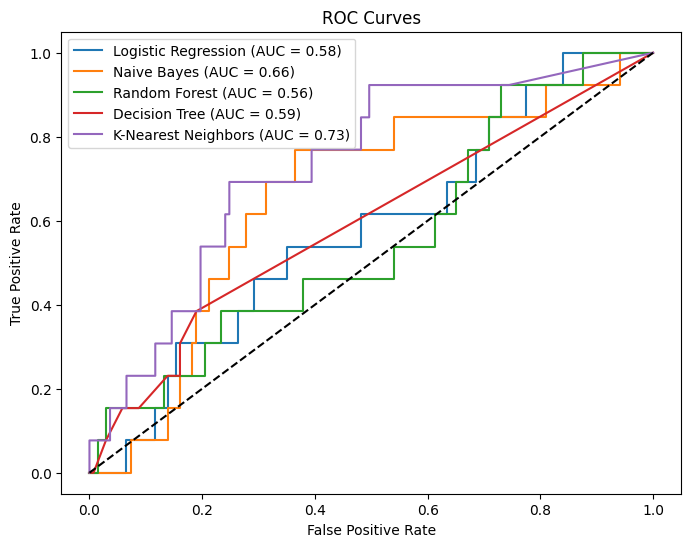

| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|-------|----------|-----------|--------|----------|---------|
| Logistic Regression  |     0.5867 |     0.1111 |     0.5385 | 0.1842 |     0.5766 |
| Naive Bayes          | 0.1067 |     0.0884 | 1.0000 |     0.1625 |     0.6575 |
| Random Forest        |     0.9000 | 0.0000 | 0.0000 | 0.0000 | 0.5553 |
| Decision Tree        |     0.8467 | 0.1429 |     0.1538 |     0.1481 |     0.5946 |
| K-Nearest Neighbors  | 0.9133 | 0.0000 | 0.0000 | 0.0000 | 0.7313 |


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# 定义评估函数
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]  # 尝试获取概率预测
    except AttributeError:
        y_prob = y_pred  # 如果模型不支持概率预测，则使用预测结果
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # 添加 zero_division 参数
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)  # 添加 zero_division 参数
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

# 评估每个模型
results = {}
for name, model in best_models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1, "ROC AUC": roc_auc}
    print(f"{name} results: {results[name]}")

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
for name, model in best_models.items():
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = model.predict(X_test)  # 如果模型不支持概率预测，则使用预测结果
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# 定义颜色函数
def color_value(value, best, worst):
    if value == best:
        return f"\033[91m{value:.4f}\033[0m"  # 红色
    elif value == worst:
        return f"\033[92m{value:.4f}\033[0m"  # 绿色
    else:
        return f"{value:.4f}"

# 将结果以 Markdown 表格的形式打印出来
def print_markdown_table(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"]
    print("| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC |")
    print("|-------|----------|-----------|--------|----------|---------|")
    
    # 计算每个指标的最好值和最差值
    best_worst = {metric: {"best": 0, "worst": 1} for metric in metrics}
    for name, metrics in results.items():
        for metric in metrics:
            best_worst[metric]["best"] = max(best_worst[metric]["best"], metrics[metric])
            best_worst[metric]["worst"] = min(best_worst[metric]["worst"], metrics[metric])
    
    # 打印表格并应用颜色
    for name, metrics in results.items():
        colored_metrics = [
            color_value(metrics[metric], best_worst[metric]["best"], best_worst[metric]["worst"])
            for metric in metrics
        ]
        print(f"| {name:<20} | {colored_metrics[0]:>10} | {colored_metrics[1]:>10} | {colored_metrics[2]:>10} | {colored_metrics[3]:>10} | {colored_metrics[4]:>10} |")

# 调用函数打印 Markdown 表格
print_markdown_table(results)

In [25]:
from sklearn.metrics import confusion_matrix
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))

Confusion Matrix for Logistic Regression:
[[81 56]
 [ 6  7]]
Confusion Matrix for Naive Bayes:
[[  3 134]
 [  0  13]]
Confusion Matrix for Random Forest:
[[137   0]
 [ 13   0]]
Confusion Matrix for Decision Tree:
[[125  12]
 [ 12   1]]
Confusion Matrix for K-Nearest Neighbors:
[[137   0]
 [ 13   0]]


In [26]:
for name, model in best_models.items():
    if hasattr(model, "feature_importances_"):
        print(f"Feature Importances for {name}:")
        print(model.feature_importances_)

Feature Importances for Random Forest:
[3.66039895e-02 3.32156863e-02 3.49611698e-02 1.94399847e-02
 4.26681005e-02 2.85038695e-02 5.25985725e-02 2.64939730e-02
 4.32554053e-02 4.12597569e-02 4.63515576e-02 2.88605167e-02
 5.09789334e-02 2.57709309e-02 1.33457562e-02 4.50917736e-02
 3.15927023e-02 1.25932984e-02 4.63765122e-02 3.46451730e-02
 4.29903441e-02 2.66084603e-02 3.42793729e-02 4.70580413e-02
 5.38668362e-02 2.25762227e-02 3.49543340e-02 2.17687234e-03
 2.12316832e-17 2.67227871e-03 3.81810477e-03 5.31250116e-03
 0.00000000e+00 2.45785118e-03 4.28970908e-03 1.01919602e-17
 3.47699509e-03 1.06270973e-03 0.00000000e+00 9.21649669e-03
 1.46785758e-17 1.09752631e-03 6.86645444e-03 6.11226859e-04
 4.45443080e-18 4.83928594e-18 7.35381241e-18 0.00000000e+00]
Feature Importances for Decision Tree:
[0.0123753  0.         0.0175601  0.         0.10522547 0.0625153
 0.03416469 0.03002757 0.0385221  0.         0.00641604 0.
 0.03147588 0.04975707 0.         0.0266452  0.06659793 0.046647

### 尝试其他模型

In [77]:
# 导入所需的机器学习模型和工具
from sklearn.linear_model import LogisticRegression  # 逻辑回归模型
from sklearn.naive_bayes import GaussianNB  # 高斯朴素贝叶斯模型
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # 随机森林分类器、梯度提升树分类器
from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
from sklearn.neighbors import KNeighborsClassifier  # K近邻分类器
from sklearn.svm import SVC  # 支持向量机分类器
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost分类器

# 定义模型及其预设的超参数
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2',  # 使用L2正则化
        class_weight='balanced',  # 自动调整类别权重以平衡数据
        max_iter=100000,  # 设置最大迭代次数为100000，确保收敛
        C=10,  # 正则化强度的倒数，较小的值表示更强的正则化
        solver='liblinear'  # 使用liblinear求解器，适用于小数据集
    ),
    "Naive Bayes": GaussianNB(),  # 使用高斯朴素贝叶斯模型，适用于连续型数据
    "Random Forest": RandomForestClassifier(
        class_weight='balanced',  # 自动调整类别权重以平衡数据
        criterion='gini',  # 使用基尼不纯度作为分裂标准
        max_depth=15,  # 每棵树的最大深度为15
        max_features='sqrt',  # 每次分裂考虑的最大特征数为sqrt
        min_samples_leaf=5,  # 叶节点的最小样本数为5
        min_samples_split=10,  # 分裂内部节点所需的最小样本数为10
        n_estimators=100  # 随机森林中树的数量为100
    ),
    "Decision Tree": DecisionTreeClassifier(
        criterion='gini',  # 使用基尼不纯度作为分裂标准
        splitter='best',  # 选择最佳分裂方式
        max_depth=15,  # 树的最大深度为15
        max_features='sqrt',  # 每次分裂考虑的最大特征数为sqrt
        min_samples_leaf=5,  # 叶节点的最小样本数为5
        min_samples_split=10  # 分裂内部节点所需的最小样本数为10
    ),
    "K-Nearest Neighbors": KNeighborsClassifier(
        weights='distance',  # 使用距离加权投票
        metric='minkowski',  # 使用闵可夫斯基距离度量
        n_neighbors=10,  # 考虑的最近邻数量为10
        leaf_size=30  # 叶节点的大小为30
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        learning_rate=0.1,  # 学习率
        n_estimators=100,  # 弱学习器的数量
        max_depth=3,  # 每棵树的最大深度
        min_samples_split=5,  # 分裂内部节点所需的最小样本数
        min_samples_leaf=5,  # 叶节点的最小样本数
        subsample=0.8,  # 子采样比例
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100,  # 弱学习器的数量
        learning_rate=0.1,  # 学习率
        random_state=42
    ),
    "SVM": SVC(
        class_weight='balanced',  # 自动调整类别权重以平衡数据
        kernel='rbf',  # 使用径向基核函数
        C=1.0,  # 正则化强度的倒数
        gamma='scale',  # 核函数的系数
        probability=True  # 启用概率估计
    )
}

# 初始化一个字典，用于存储每个训练完成的模型
best_models = {}

# 遍历每个模型并进行训练
for name, model in models.items():
    print(f"Training {name}...")  # 打印当前正在训练的模型名称
    model.fit(X_train, y_train)  # 在训练集上训练模型
    best_models[name] = model  # 将训练完成的模型存储到字典中
    print(f"{name} training completed.")  # 打印训练完成的提示信息

Training Logistic Regression...
Logistic Regression training completed.
Training Naive Bayes...
Naive Bayes training completed.
Training Random Forest...
Random Forest training completed.
Training Decision Tree...
Decision Tree training completed.
Training K-Nearest Neighbors...
K-Nearest Neighbors training completed.
Training Gradient Boosting...
Gradient Boosting training completed.
Training AdaBoost...
AdaBoost training completed.
Training SVM...
SVM training completed.


### 评估性能

Logistic Regression results: {'Accuracy': 0.5866666666666667, 'Precision': 0.1111111111111111, 'Recall': 0.5384615384615384, 'F1': 0.18421052631578946, 'ROC AUC': 0.5766423357664234}
Naive Bayes results: {'Accuracy': 0.10666666666666667, 'Precision': 0.08843537414965986, 'Recall': 1.0, 'F1': 0.1625, 'ROC AUC': 0.6574957888826503}
Random Forest results: {'Accuracy': 0.9133333333333333, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.514879281302639}
Decision Tree results: {'Accuracy': 0.8733333333333333, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.5005614823133072}
K-Nearest Neighbors results: {'Accuracy': 0.9133333333333333, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.686692869174621}
Gradient Boosting results: {'Accuracy': 0.8866666666666667, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.6355979786636721}
AdaBoost results: {'Accuracy': 0.9133333333333333, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.5836608646827625}
SVM result

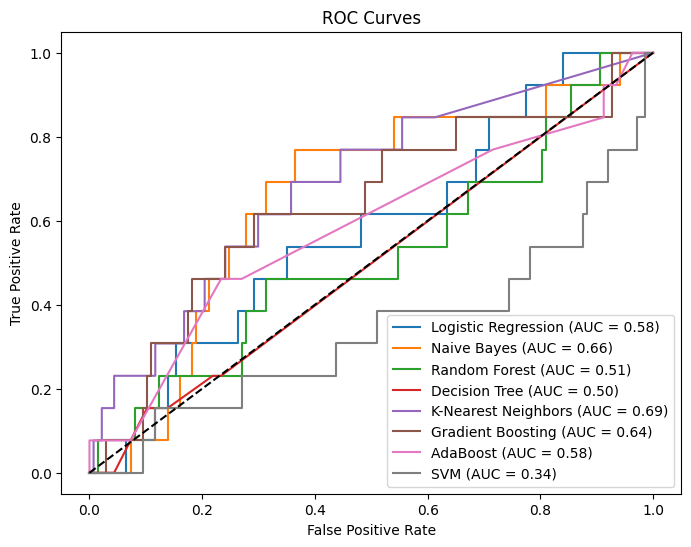

| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|-------|----------|-----------|--------|----------|---------|
| Logistic Regression  |     0.5867 |     0.1111 |     0.5385 |     0.1842 |     0.5766 |
| Naive Bayes          | 0.1067 |     0.0884 | 1.0000 |     0.1625 |     0.6575 |
| Random Forest        | 0.9133 | 0.0000 | 0.0000 | 0.0000 |     0.5149 |
| Decision Tree        |     0.8733 | 0.0000 | 0.0000 | 0.0000 |     0.5006 |
| K-Nearest Neighbors  | 0.9133 | 0.0000 | 0.0000 | 0.0000 | 0.6867 |
| Gradient Boosting    |     0.8867 | 0.0000 | 0.0000 | 0.0000 |     0.6356 |
| AdaBoost             | 0.9133 | 0.0000 | 0.0000 | 0.0000 |     0.5837 |
| SVM                  |     0.9000 | 0.3333 |     0.1538 | 0.2105 | 0.3403 |


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# 定义评估函数
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]  # 尝试获取概率预测
    except AttributeError:
        y_prob = y_pred  # 如果模型不支持概率预测，则使用预测结果
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # 添加 zero_division 参数
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)  # 添加 zero_division 参数
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

# 评估每个模型
results = {}
for name, model in best_models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1, "ROC AUC": roc_auc}
    print(f"{name} results: {results[name]}")

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
for name, model in best_models.items():
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = model.predict(X_test)  # 如果模型不支持概率预测，则使用预测结果
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# 定义颜色函数
def color_value(value, best, worst):
    if value == best:
        return f"\033[91m{value:.4f}\033[0m"  # 红色
    elif value == worst:
        return f"\033[92m{value:.4f}\033[0m"  # 绿色
    else:
        return f"{value:.4f}"

# 将结果以 Markdown 表格的形式打印出来
def print_markdown_table(results):
    metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"]
    print("| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC |")
    print("|-------|----------|-----------|--------|----------|---------|")
    
    # 计算每个指标的最好值和最差值
    best_worst = {metric: {"best": 0, "worst": 1} for metric in metrics}
    for name, metrics in results.items():
        for metric in metrics:
            best_worst[metric]["best"] = max(best_worst[metric]["best"], metrics[metric])
            best_worst[metric]["worst"] = min(best_worst[metric]["worst"], metrics[metric])
    
    # 打印表格并应用颜色
    for name, metrics in results.items():
        colored_metrics = [
            color_value(metrics[metric], best_worst[metric]["best"], best_worst[metric]["worst"])
            for metric in metrics
        ]
        print(f"| {name:<20} | {colored_metrics[0]:>10} | {colored_metrics[1]:>10} | {colored_metrics[2]:>10} | {colored_metrics[3]:>10} | {colored_metrics[4]:>10} |")

# 调用函数打印 Markdown 表格
print_markdown_table(results)

### 第五部分：结果分析


Best model: Logistic Regression


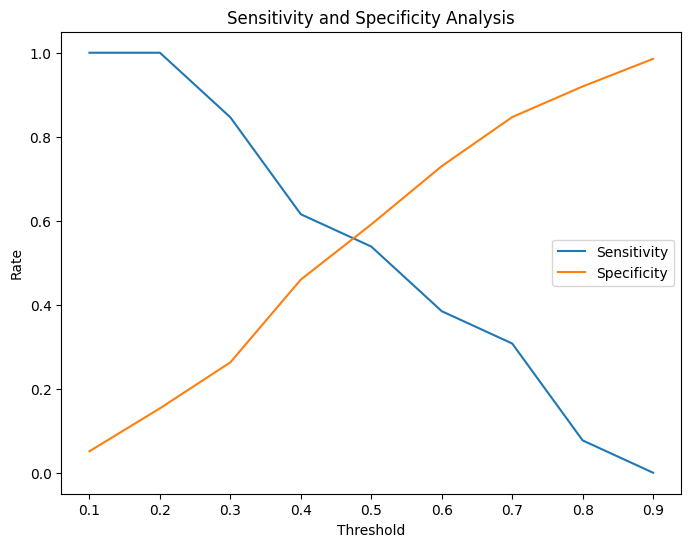

In [20]:
# 性能比较
best_model_name = max(results, key=lambda k: results[k]["F1"])
best_model = best_models[best_model_name]
print(f"Best model: {best_model_name}")

# 敏感性分析
thresholds = np.arange(0.1, 1, 0.1)
sensitivity = []
specificity = []
for threshold in thresholds:
    y_pred = (best_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    tp = np.sum((y_test == 1) & (y_pred == 1))
    fn = np.sum((y_test == 1) & (y_pred == 0))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, sensitivity, label="Sensitivity")
plt.plot(thresholds, specificity, label="Specificity")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("Sensitivity and Specificity Analysis")
plt.legend()
plt.show()

### 第六部分：外部验证


In [ ]:
# # 加载外部数据集
# external_data_path = "/path/to/external_data.csv"
# external_data = pd.read_csv(external_data_path)

# # 应用相同的预处理步骤
# external_X = external_data.drop(columns=["ESKD Status"])
# external_y = external_data["ESKD Status"].map({"ESKD+": 1, "ESKD-": 0})

# # 处理缺失值、编码和标准化
# external_X_imputed = pd.DataFrame(imputer.transform(external_X[continuous_features]), columns=continuous_features)
# external_X_encoded = encoder.transform(external_X[categorical_features]).toarray()
# external_X_encoded_df = pd.DataFrame(external_X_encoded, columns=encoded_feature_names)
# external_X_prepared = pd.concat([external_X_imputed, external_X_encoded_df], axis=1)
# external_X_scaled = scaler.transform(external_X_prepared)

# # 在外部数据集上验证模型
# external_accuracy, external_precision, external_recall, external_f1, external_roc_auc = evaluate_model(best_model, external_X_scaled, external_y)
# print(f"External validation results: Accuracy={external_accuracy:.2f}, Precision={external_precision:.2f}, Recall={external_recall:.2f}, F1={external_f1:.2f}, ROC AUC={external_roc_auc:.2f}")

### 第七部分：模型改进


In [ ]:
# 纳入更多特征
# 假设新增了尿液检测指标ACR
data["ACR"] = np.random.normal(loc=10, scale=5, size=len(data))  # 示例数据
continuous_features.append("ACR")

# 重新处理数据
X_improved = data.drop(columns=["ESKD Status"])
X_improved_imputed = pd.DataFrame(imputer.fit_transform(X_improved[continuous_features]), columns=continuous_features)
X_improved_encoded = encoder.fit_transform(X_improved[categorical_features]).toarray()
X_improved_encoded_df = pd.DataFrame(X_improved_encoded, columns=encoded_feature_names)
X_improved_prepared = pd.concat([X_improved_imputed, X_improved_encoded_df], axis=1)
X_improved_scaled = scaler.fit_transform(X_improved_prepared)

# 重新训练模型
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(X_improved_scaled, y, test_size=0.2, stratify=y, random_state=42)
best_models_improved = {}
for name, model in models.items():
    print(f"Training improved {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_improved, y_train_improved)
    best_models_improved[name] = grid_search.best_estimator_
    print(f"Best parameters for improved {name}: {grid_search.best_params_}")

# 评估改进后的模型
results_improved = {}
for name, model in best_models_improved.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test_improved, y_test_improved)
    results_improved[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1, "ROC AUC": roc_auc}
    print(f"Improved {name} results: {results_improved[name]}")

Training improved Logistic Regression...
Best parameters for improved Logistic Regression: {'C': 0.1}
Training improved Naive Bayes...
Best parameters for improved Naive Bayes: {}
Training improved Random Forest...
Best parameters for improved Random Forest: {'max_depth': None, 'n_estimators': 50}
Training improved Decision Tree...
Best parameters for improved Decision Tree: {'max_depth': 5}
Training improved K-Nearest Neighbors...
Best parameters for improved K-Nearest Neighbors: {'n_neighbors': 7}
Improved Logistic Regression results: {'Accuracy': 0.9066666666666666, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.6226838854576081}
Improved Naive Bayes results: {'Accuracy': 0.10666666666666667, 'Precision': 0.08843537414965986, 'Recall': 1.0, 'F1': 0.1625, 'ROC AUC': 0.6580572711959574}
Improved Random Forest results: {'Accuracy': 0.9133333333333333, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.555586749017406}
Improved Decision Tree results: {'Accuracy': 0.9, 'P

/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 保存最佳模型参数

In [ ]:
import joblib
import os

# 确保保存模型的目录存在
model_dir = "/workspace/models"
os.makedirs(model_dir, exist_ok=True)

# 保存模型
model_path = os.path.join(model_dir, "best_model.pkl")
joblib.dump(best_model, model_path)

# 保存标准化器
scaler_path = os.path.join(model_dir, "scaler.pkl")
joblib.dump(scaler, scaler_path)

# 保存特征列
features_path = os.path.join(model_dir, "features.pkl")
joblib.dump(X_prepared.columns, features_path)

['/workspace/models/features.pkl']

### 第八部分：临床应用


In [ ]:
# ! pip install flask

Looking in indexes: https://mirrors.tencent.com/pypi/simple/

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# # app.py
# from flask import Flask, request, jsonify
# import joblib
# import numpy as np
# import os

# app = Flask(__name__)

# # 加载模型、标准化器和特征列
# model_path = "/workspace/models/best_model.pkl"
# scaler_path = "/workspace/models/scaler.pkl"
# features_path = "/workspace/models/features.pkl"

# best_model = joblib.load(model_path)
# scaler = joblib.load(scaler_path)
# features = joblib.load(features_path)

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.json
#     input_data = np.array([data[feature] for feature in features]).reshape(1, -1)
#     input_data_scaled = scaler.transform(input_data)
#     prediction = best_model.predict(input_data_scaled)
#     return jsonify({"prediction": "ESKD+" if prediction[0] == 1 else "ESKD-"})

# if __name__ == '__main__':
#     app.run(debug=True, port=5001)

Model saved to models/best_model.pkl
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._

SystemExit: 1

/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
